In [1]:
Link = 'https://github.com/natsunoyuki/blog_posts/blob/main/data_science/Bayesian%20Optimization%20of%20Model%20Hyperparameters.ipynb'

BASIC

In [2]:
SEED = 1412
Test_Ratio = 0.2
import os 
import pandas as pd

In [3]:
Home = os.getcwd()
DataFolder = 'Data'
try:
    os.mkdir(DataFolder)
except:
    print('Already Got the Data Folder')
DataFolder = os.path.join(Home,DataFolder)

MainResultFolder = 'Main_Result'
try:
    os.mkdir(MainResultFolder)
except:
    print('Already Got this Data Folder too')
MainResultFolder = os.path.join(Home,MainResultFolder)

Supplementary_result = 'Supplementary_Result'
try:
    os.mkdir(Supplementary_result)
except:
    print('High on Energy')
Supplementary_result = os.path.join(Home,Supplementary_result)


BASIC

DB

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

def Make_db():
  print("New db")
  
  remove_lst = [os.path.join(DataFolder,i) for i in os.listdir(DataFolder)]
  for i in remove_lst:
    os.remove(i)

  X,y = make_classification(n_samples=10000,n_features=5,n_informative=2,n_classes=2,n_clusters_per_class=1,flip_y=float(f'0.{SEED}'),shuffle=False,random_state=SEED)
  #95 -> 4.5%
  #90 -> 14%
  #89 -> 14.12%
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = Test_Ratio, random_state = SEED)

  Train = pd.DataFrame(X_train)
  Train['Answers'] = y_train
  Test = pd.DataFrame(X_test)
  Test['Answers'] = y_test

  Train_Folder = os.path.join(DataFolder,'Train.csv')
  Test_Folder = os.path.join(DataFolder,'Test.csv')

  Train.to_csv(Train_Folder)
  Test.to_csv(Test_Folder)


In [5]:
if 'Train.csv' not in os.listdir(DataFolder) or 'Test.csv' not in os.listdir(DataFolder): 
  Make_db()

  remove_lst = [ os.path.join(MainResultFolder,i) for i in os.listdir(MainResultFolder)]
  for i in remove_lst:
    os.remove(i)

  remove_lst = [ os.path.join(Supplementary_result,i) for i in os.listdir(Supplementary_result)]
  for i in remove_lst:
    os.remove(i)

#New data new results

New db


DB

FILES

In [6]:
Train_File = os.path.join(DataFolder,'Train.csv')
Test_File = os.path.join(DataFolder,'Test.csv')

In [7]:
Train = pd.read_csv(Train_File)
Test = pd.read_csv(Test_File)
col_lst = list(Test.columns)
col_lst.remove('Answers')
col_lst = [i for i in col_lst if not i.startswith('Unnamed')]
X_train = Train[col_lst]
X_test = Test[col_lst]
y_train = Train['Answers']
y_test = Test['Answers']

FILES

In [8]:
len(Test),len(Train)

(2000, 8000)

In [9]:
import json
import numpy as np 
import niapy
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
from sklearn.ensemble import RandomForestClassifier


CUCKOO SEARCH

In [10]:
from niapy.algorithms.basic import CuckooSearch

CucKoo_pbounds = {'population_size':(10,100),'pa':(0.1,1.0) ,'n_estimator':(10,1000),'criterion':(0,1),'max_feature':(0,1)}

def mdl_Cuckoo(population_size,pa,n_estimator,criterion,max_feature):
    
    population_size = int(population_size)
    n_estimator = int(n_estimator)
    if criterion < 0.5:
        criterion = 'gini'
    else:
        criterion = 'entropy'
    if max_feature < 0.34:
        max_feature = 'sqrt'
    elif max_feature < 0.67:
        max_feature = 'log2'
    else:
        max_feature = None

    Algo = CuckooSearch()
    Algo.set_parameters(population_size=population_size,pa=pa,seed=SEED)

    nia_mdl = NatureInspiredSearchCV(
        estimator=RandomForestClassifier(n_estimators=n_estimator,criterion=criterion,max_features=max_feature),
        param_grid={},
        algorithm=Algo,
        runs=1
    )
    return nia_mdl

CUCKOO SEARCH

FIRE FLY 

In [11]:
from niapy.algorithms.basic import FireflyAlgorithm

FireFly_pbounds = {'population_size':(10,100),'alpha':(0.1,1.0),'beta0':(0.01,100),'gamma':(0.1,1.0),'theta':(0.1,1.0),'n_estimator':(10,1000),'criterion':(0,1),'max_feature':(0,1)}

def mdl_Firefly(population_size,alpha,beta0,gamma,theta,n_estimator,criterion,max_feature):
    
    population_size = int(population_size)
    n_estimator = int(n_estimator)
    if criterion < 0.5:
        criterion = 'gini'
    else:
        criterion = 'entropy'
    if max_feature < 0.34:
        max_feature = 'sqrt'
    elif max_feature < 0.67:
        max_feature = 'log2'
    else:
        max_feature = None

    Algo = FireflyAlgorithm()
    Algo.set_parameters(population_size=population_size,alpha=alpha,beta0=beta0,gamma=gamma,theta=theta,seed=SEED)

    nia_mdl = NatureInspiredSearchCV(
        estimator=RandomForestClassifier(n_estimators=n_estimator,criterion=criterion,max_features=max_feature),         
        param_grid={},
        algorithm=Algo,
        runs=1
    )
    return nia_mdl

FIRE FLY 

BAT

In [12]:
from niapy.algorithms.basic import BatAlgorithm

BAT_pbounds = {'population_size':(10,100),'loudness':(0.1,1.0),'pulse_rate':(0.1,1.0),'gamma':(0.1,1.0),'alpha':(0.1,1.0),'min_frequency':(0,10),'max_frequency':(10,100),'n_estimator':(10,1000),'criterion':(0,1),'max_feature':(0,1)}

def mdl_Bat(population_size,loudness,pulse_rate,gamma,alpha,min_frequency,max_frequency,n_estimator,criterion,max_feature):
    
    population_size = int(population_size)
    n_estimator = int(n_estimator)
    if criterion < 0.5:
        criterion = 'gini'
    else:
        criterion = 'entropy'
    if max_feature < 0.34:
        max_feature = 'sqrt'
    elif max_feature < 0.67:
        max_feature = 'log2'
    else:
        max_feature = None

    Algo = BatAlgorithm()
    Algo.set_parameters(population_size=population_size,loudness=loudness,pulse_rate=pulse_rate,alpha=alpha,gamma=gamma,min_frequency=min_frequency,max_frequency=max_frequency,seed=SEED)

    nia_mdl = NatureInspiredSearchCV(
        estimator=RandomForestClassifier(n_estimators=n_estimator,criterion=criterion,max_features=max_feature),         
        param_grid={},
        algorithm=Algo,
        runs=1
    )
    return nia_mdl

BAT

SELF ADAPTIVE BAT

In [13]:
from niapy.algorithms.modified import AdaptiveBatAlgorithm

SABA_pbounds = {'population_size':(10,100),'loudness':(0.1,1.0),'pulse_rate':(0.1,1.0),'epsilon':(0,0.1),'alpha':(0.1,1.0),'min_frequency':(0,10),'max_frequency':(10,100),'n_estimator':(10,1000),'criterion':(0,1),'max_feature':(0,1)}

def mdl_SBA(population_size,loudness,pulse_rate,epsilon,alpha,min_frequency,max_frequency,n_estimator,criterion,max_feature):
    
    population_size = int(population_size)
    n_estimator = int(n_estimator)
    if criterion < 0.5:
        criterion = 'gini'
    else:
        criterion = 'entropy'
    if max_feature < 0.34:
        max_feature = 'sqrt'
    elif max_feature < 0.67:
        max_feature = 'log2'
    else:
        max_feature = None

    Algo = AdaptiveBatAlgorithm()
    Algo.set_parameters(population_size=population_size,loudness=loudness,pulse_rate=pulse_rate,alpha=alpha,epsilon=epsilon,min_frequency=min_frequency,max_frequency=max_frequency,seed=SEED)

    nia_mdl = NatureInspiredSearchCV(
        estimator=RandomForestClassifier(n_estimators=n_estimator,criterion=criterion,max_features=max_feature),         
        param_grid={},
        algorithm=Algo,
        runs=1
    )
    return nia_mdl

SELF ADAPTIVE BAT

PARTICLE SWARM

In [14]:
from niapy.algorithms.basic import ParticleSwarmAlgorithm

PSA_pbounds = {'population_size':(10,100),'c1':(0,4),'c2':(0,4),'w':(0,1),'min_velocity':(-10,0),'max_velocity':(0,10),'repair':(0,5),'n_estimator':(10,1000),'criterion':(0,1),'max_feature':(0,1)}

def mdl_PSA(population_size,c1,c2,w,min_velocity,max_velocity,repair,n_estimator,criterion,max_feature):

    population_size = int(population_size)
    n_estimator = int(n_estimator)
    if criterion < 0.5:
        criterion = 'gini'
    else:
        criterion = 'entropy'
    if max_feature < 0.34:
        max_feature = 'sqrt'
    elif max_feature < 0.67:
        max_feature = 'log2'
    else:
        max_feature = None
    #limit, limit_inverse, wang, rand, reflect
    repair_name = ''
    if repair < 1.0:
        repair = niapy.util.repair.limit
        repair_name = 'limit'
    elif repair < 2.0:
        repair = niapy.util.repair.limit_inverse
        repair_name = 'limit_inverse'
    elif repair < 3.0:
        repair = niapy.util.repair.wang
        repair_name = 'wang'
    elif repair < 4.0:
        repair = niapy.util.repair.rand
        repair_name = 'rand'
    else:
        repair = niapy.util.repair.reflect
        repair_name = 'reflect'

    Algo = ParticleSwarmAlgorithm()
    Algo.set_parameters(population_size=population_size,c1=c1,c2=c2,w=w,min_velocity=min_velocity,max_velocity=max_velocity,repair=repair,seed=SEED) 

    nia_mdl = NatureInspiredSearchCV(
        estimator=RandomForestClassifier(n_estimators=n_estimator,criterion=criterion,max_features=max_feature),         
        param_grid={},
        algorithm=Algo,
        runs=1,
    )
    return nia_mdl

Link = 'https://www.researchgate.net/profile/Mohamed_Mourad_Lafifi/post/Which-is-the-best-swarm-size-in-PSO/attachment/5b5b6f85b53d2f89289c14e1/AS%3A653084896288769%401532718981208/download/Good+Parameters+for+Particle+Swarm+Optimization.pdf'

PARTICLE SWARM

Camel Algorithm

In [15]:
from niapy.algorithms.basic import CamelAlgorithm

camel_bounds = {'population_size':(10,100), 'burden_factor':(0.1,1.0), 'death_rate':(0.1,1.0), 'visibility':(0.1,1.0),'supply_init':(1,1000),'endurance_init':(0,1000), 'min_temperature':(-100,0), 'max_temperature':(1,100),'n_estimator':(10,1000),'criterion':(0,1),'max_feature':(0,1)}

def mdl_camel(population_size,burden_factor,death_rate,visibility,supply_init,endurance_init,min_temperature,max_temperature,n_estimator,criterion,max_feature):

    population_size = int(population_size)
    n_estimator = int(n_estimator)
    if criterion < 0.5:
        criterion = 'gini'
    else:
        criterion = 'entropy'
    if max_feature < 0.34:
        max_feature = 'sqrt'
    elif max_feature < 0.67:
        max_feature = 'log2'
    else:
        max_feature = None

    Algo = CamelAlgorithm()
    Algo.set_parameters(population_size=population_size,burden_factor=burden_factor,death_rate=death_rate,visibility=visibility,supply_init=supply_init,endurance_init=endurance_init,min_temperature=min_temperature,max_temperature=max_temperature,seed=SEED) 

    nia_mdl = NatureInspiredSearchCV(
        estimator=RandomForestClassifier(n_estimators=n_estimator,criterion=criterion,max_features=max_feature),         
        param_grid={},
        algorithm=Algo,
        runs=1,
    )
    return nia_mdl

Camel Algorithm

BAYESIAN PARAMETERS

In [16]:

NIA_Name = {0:'Cuckoo Search',1:'Fire Fly',2:'Bat',3:'Self Adaptive Bat',4:'Particle Swarm', 5:'Camel Algorithm'}

NIA_pbounds_lst = {0:CucKoo_pbounds, 1:FireFly_pbounds, 2:BAT_pbounds, 3:SABA_pbounds, 4:PSA_pbounds, 5:camel_bounds}

mdl_fxn = {0:mdl_Cuckoo,1:mdl_Firefly,2:mdl_Bat,3:mdl_SBA,4:mdl_PSA,5:mdl_camel}
#mdl_camel(para_str)

BAYESIAN PARAMETERS

FUNCTION LIST

In [17]:
from bayes_opt import BayesianOptimization, UtilityFunction
from matplotlib import pyplot as plt 
import time 

ENERGY FUNCTIONS

In [18]:
energy_file = [ os.path.join(os.getcwd(),x) for x in os.listdir() if x.endswith('.csv')][0]
energy_file
#always check for latest copy whenever you check

'c:\\Users\\chand\\Desktop\\temp_here\\Green-Computing\\my_tries\\full\\Kid_The_Energy_Time_Keeper.csv'

In [19]:
def Get_Time_Energy(Start_idx,End_idx):

    temp_df = pd.read_csv(energy_file)
    temp_df_cols = list(temp_df.columns)

    ret_dict = {'Time Taken(s)':int(End_idx-Start_idx), 'Total Power(J)':0.0, 'CPU(J)':0.0, 'Monitor(J)':0.0, 'Disk(J)':0.0, 'Base(J)':0.0}
    ret_dict_cols = list(ret_dict.keys())

    for curr_idx in range(Start_idx,End_idx):
        for i in range(1,len(ret_dict_cols)):
              ret_dict[ret_dict_cols[i]] += temp_df[temp_df_cols[i]][curr_idx]
    
    return ret_dict
    

BAYESIAN FUNCTION

In [20]:
def Optimize_and_plot(bounds,curr_mdl_fxn,Algo_name:str,Iters:int):
    os.remove(energy_file)
    time.sleep(2)
    
    print(f'Currently at {Algo_name}')

    optimizer = BayesianOptimization(f = None, pbounds = bounds, verbose = 2, random_state = SEED)
    utility = UtilityFunction(kind = "ucb", kappa = 1.96, xi = 0.01)

    #ID refers to Iteration ID, it is of format f'{Algo_name[:3]}0{Iteration_no}'
    #^ This is gonna be Primary Key

    #All Parameters
    Parameter_df = pd.DataFrame()
    col_lst = ['ID'] + list(bounds.keys())
    for col_name in col_lst:
        Parameter_df[col_name] = []

    #All results like Accuracy, time taken, Energy, CO2 
    Result_df = pd.DataFrame()
    col_lst = ['ID', 'Accuracy', 'Time Taken (s)', 'Energy Used (J)', 'Equivalent CO2 Emission (mg)']
    for col_name in col_lst:
        Result_df[col_name] = []

    #Energy Distribution
    Energy_df = pd.DataFrame()
    col_lst = ['ID', 'Time Taken(s)', 'Total Power(J)', 'CPU(J)', 'Monitor(J)', 'Disk(J)', 'Base(J)']
    for col_name in col_lst:
        Energy_df[col_name] = []

    for i in range(Iters):
        Curr_ID = f'{Algo_name[:3].upper()}-{i:>4}'.replace(' ','0')
        # Get optimizer to suggest a new parameter value to try.
        next_point = optimizer.suggest(utility)  
        # Evaluate the output of the black_box_function using the new parameter value.

        Parameter_df.loc[len(Parameter_df)] = [Curr_ID] + list(next_point.values())#Parameter Dict Done

        curr_mdl = curr_mdl_fxn(**next_point)

        Start_idx = len(pd.read_csv(energy_file))
        curr_mdl.fit(X_train,y_train)
        target = curr_mdl.score(X_test,y_test)
        End_idx = len(pd.read_csv(energy_file))
        #print(Start_idx,End_idx)


        Energy_dict = Get_Time_Energy(Start_idx,End_idx)
        #{'Time Taken(s)':int(End_idx-Start_idx+1), 'Total Power(J)':0.0, 'CPU(J)':0.0, 'Monitor(J)':0.0, 'Disk(J)':0.0, 'Base(J)':0.0}

        Result_df.loc[len(Result_df)] = [Curr_ID, target, Energy_dict['Time Taken(s)'], Energy_dict['Total Power(J)'], (17.0/72.0)*Energy_dict['Total Power(J)']]
        #['ID', 'Accuracy', 'Time Taken (s)', 'Energy Used (J)', 'Equivalent CO2 Emission (mg)']
        
        '''emission 
        1 kW-hr = 0.85 Kg of CO2 emission 
        36 e5 - 85 e4 mg
        360 - 85
        72 J - 17mg CO2 
        1 J = (17.0/72.0) mg CO2
        ''' 

        Energy_df.loc[len(Energy_df)] = [Curr_ID] + list(Energy_dict.values())
        #['ID', 'Time Taken(s)', 'Total Power(J)', 'CPU(J)', 'Monitor(J)', 'Disk(J)', 'Base(J)']

        try:
            # Update the optimizer with the evaluation results. This needs to be in try-except
            # to prevent repeat errors from occuring.
            optimizer.register(params = next_point, target = target)
        except:
            print('What was that?')
            pass

    Result_df.to_csv(os.path.join(MainResultFolder,f'{Algo_name}.csv')) 
    Parameter_df.to_csv(os.path.join(Supplementary_result,f'{Algo_name}_Parameter.csv'))
    Energy_df.to_csv(os.path.join(Supplementary_result,f'{Algo_name}_Energy_Distribution.csv'))

    plt.plot(range(1, 1+len(optimizer.space.target)), optimizer.space.target, "-o")
    plt.grid(True)
    plt.xlabel("Iteration")
    plt.ylabel("Score")
    plt.show()
    plt.savefig(os.path.join(Supplementary_result,f'{Algo_name}_Iterations.svg')  ,format='svg')
    plt.show()


BAYESIAN FUNCTION

Currently at Cuckoo Search
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candi

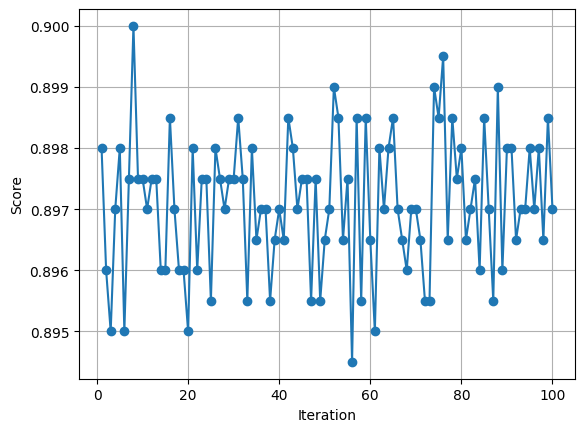

<Figure size 640x480 with 0 Axes>

Currently at Fire Fly
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates

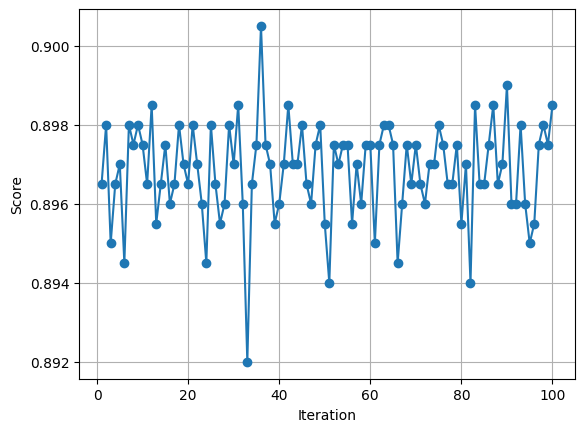

<Figure size 640x480 with 0 Axes>

Currently at Bat
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Opti

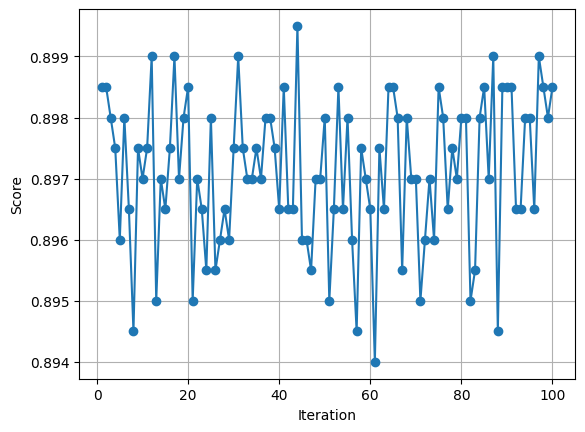

<Figure size 640x480 with 0 Axes>

Currently at Self Adaptive Bat
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 c

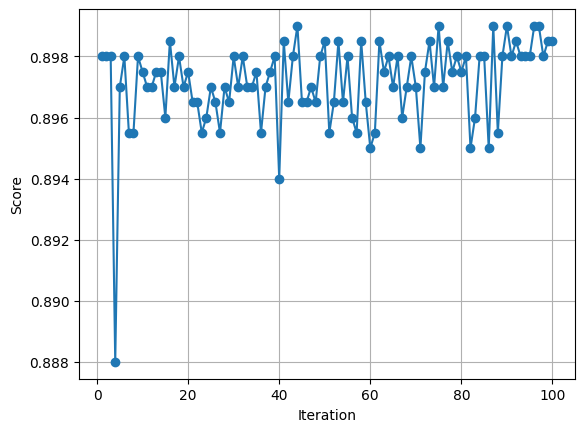

<Figure size 640x480 with 0 Axes>

Currently at Particle Swarm
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 cand

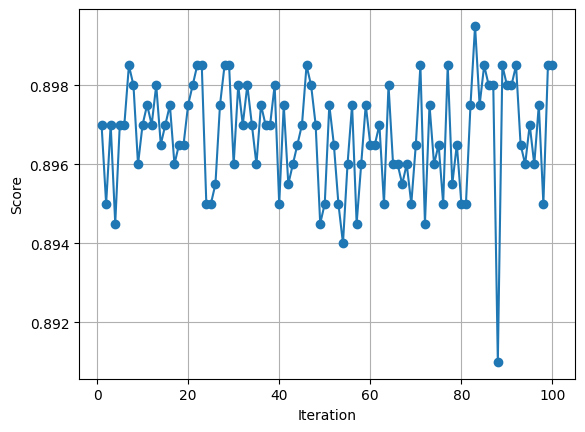

<Figure size 640x480 with 0 Axes>

Currently at Camel Algorithm
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 candidates
Optimization finished, 1 candidates were fitted
Fitting at most 1.0 can

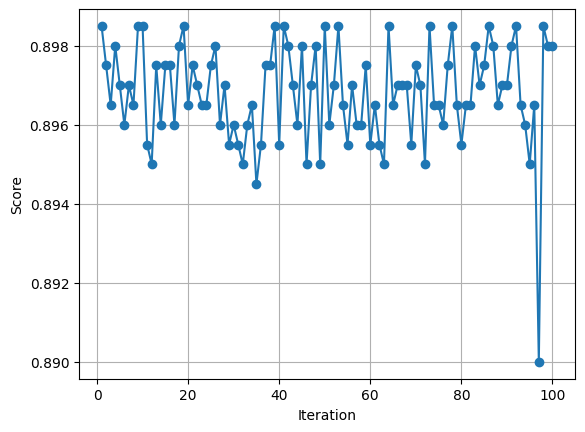

<Figure size 640x480 with 0 Axes>

In [21]:
#def Optimize_and_plot(bounds,curr_mdl_fxn,Algo_name:str,Iters:int):
for i in range(len(mdl_fxn)):
    Optimize_and_plot(bounds=NIA_pbounds_lst[i],curr_mdl_fxn=mdl_fxn[i],Algo_name=NIA_Name[i],Iters=100)
    

BASE CASE

In [22]:
os.remove(energy_file)
time.sleep(2)
curr_mdl = RandomForestClassifier()
Start_idx = len(pd.read_csv(energy_file))
curr_mdl.fit(X_train,y_train)
target = curr_mdl.score(X_test,y_test)
End_idx = len(pd.read_csv(energy_file))

Energy_dict = Get_Time_Energy(Start_idx,End_idx)
#{'Time Taken(s)':int(End_idx-Start_idx+1), 'Total Power(J)':0.0, 'CPU(J)':0.0, 'Monitor(J)':0.0, 'Disk(J)':0.0, 'Base(J)':0.0}

Curr_ID = 'BASE-0001'

In [ ]:
#All results like Accuracy, time taken, Energy, CO2 
Result_df = pd.DataFrame()
col_lst = ['ID', 'Accuracy', 'Time Taken (s)', 'Energy Used (J)', 'Equivalent CO2 Emission (mg)']
for col_name in col_lst:
    Result_df[col_name] = []

#Energy Distribution
Energy_df = pd.DataFrame()
col_lst = ['ID', 'Time Taken(s)', 'Total Power(J)', 'CPU(J)', 'Monitor(J)', 'Disk(J)', 'Base(J)']
for col_name in col_lst:
    Energy_df[col_name] = []


In [ ]:

Result_df.loc[len(Result_df)] = [Curr_ID, target, Energy_dict['Time Taken(s)'], Energy_dict['Total Power(J)'], (17.0/72.0)*Energy_dict['Total Power(J)']]
#['ID', 'Accuracy', 'Time Taken (s)', 'Energy Used (J)', 'Equivalent CO2 Emission (mg)']

Energy_df.loc[len(Energy_df)] = [Curr_ID] + list(Energy_dict.values())
#['ID', 'Time Taken(s)', 'Total Power(J)', 'CPU(J)', 'Monitor(J)', 'Disk(J)', 'Base(J)']


In [ ]:
Result_df.to_csv(os.path.join(MainResultFolder,'Base.csv')) 
Energy_df.to_csv(os.path.join(Supplementary_result,'Base_Energy_Distribution.csv'))

BASE CASE

function ClickConnect(){
               
console.log("Working"); 
document.querySelector("#comments > span").click() 
}
setInterval(ClickConnect,5000)